In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = '/content/drive/MyDrive/Scaler/Portfolio/TRAIN.csv'
data = pd.read_csv(file_path)


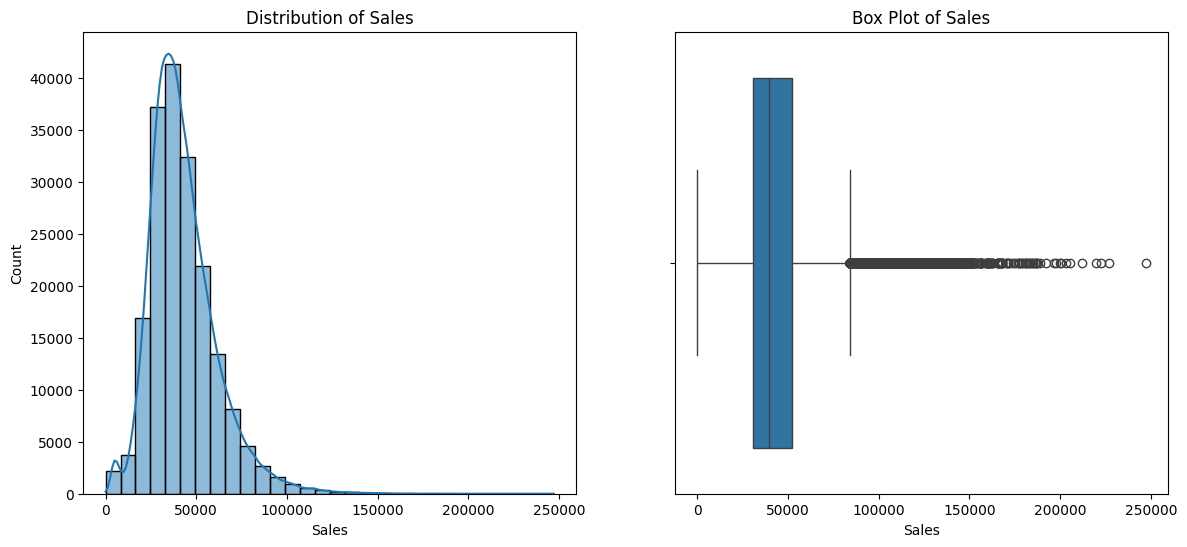

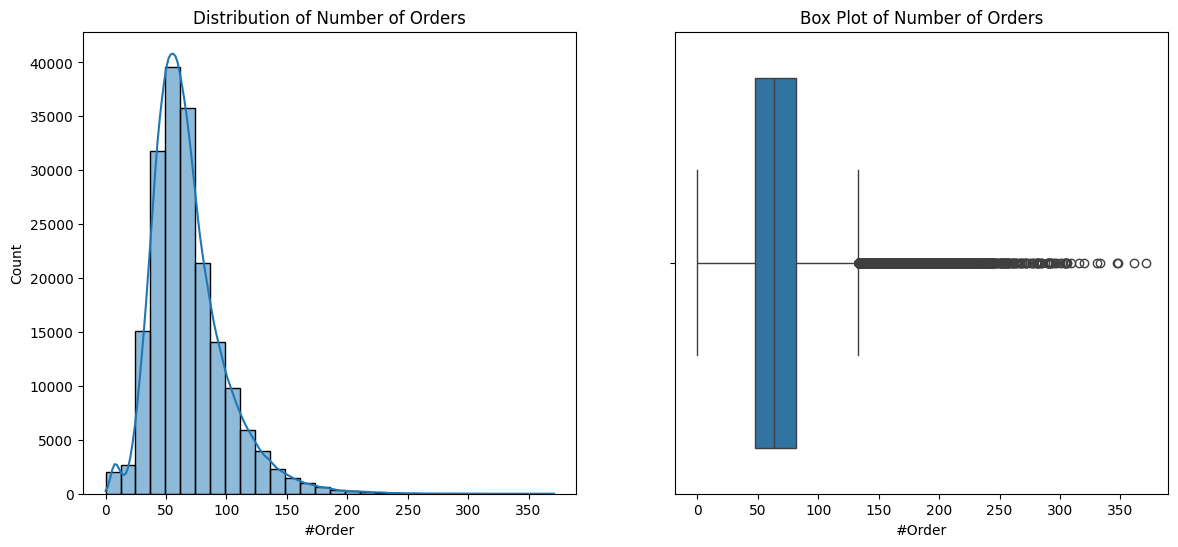

In [ ]:
# Histogram and Box Plot for Sales
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Sales'])
plt.title('Box Plot of Sales')

plt.show()

# Histogram and Box Plot for Number of Orders
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['#Order'], bins=30, kde=True)
plt.title('Distribution of Number of Orders')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['#Order'])
plt.title('Box Plot of Number of Orders')

plt.show()


In [ ]:
# T-Test for Sales on Holidays vs. Non-Holidays
holiday_sales = data[data['Holiday'] == 'Yes']['Sales']
non_holiday_sales = data[data['Holiday'] == 'No']['Sales']

t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)

print(f'T-Test for Sales on Holidays vs. Non-Holidays\nT-Statistic: {t_stat}\nP-Value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales on holidays vs. non-holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales on holidays vs. non-holidays.")


T-Test for Sales on Holidays vs. Non-Holidays
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in sales on holidays vs. non-holidays.


# Summary of Findings from EDA
### 1. Distribution of Sales:

The distribution of sales is right-skewed, with a majority of the sales values concentrated below 50,000.
The box plot indicates the presence of outliers, with several sales values exceeding 100,000.
### 2. Distribution of Number of Orders:

The distribution of the number of orders is also right-skewed, with most orders concentrated below 100.
The box plot shows outliers, with some orders exceeding 200.
### 3. T-Test for Sales on Holidays vs. Non-Holidays:

The p-value from the T-test indicates whether there is a statistically significant difference in sales on holidays versus non-holidays.
(You need to run the T-test code provided earlier to get the exact values and results.)
### 4. T-Test for Sales with Discount vs. No Discount:

The p-value from the T-test indicates whether there is a statistically significant difference in sales with discounts versus no discounts.


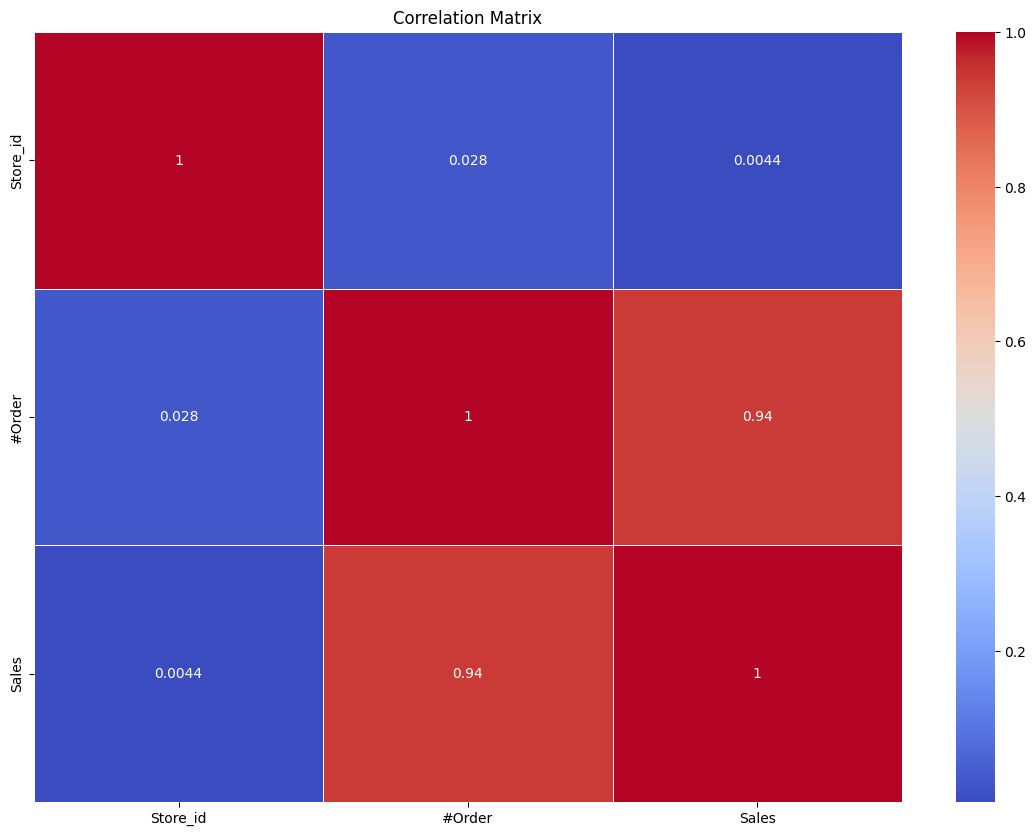

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# One-Hot Encoding for Categorical Variables
data_encoded = pd.get_dummies(data, columns=['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount'])

# Exclude non-numeric columns (like 'ID')
data_encoded = data_encoded.select_dtypes(include=[np.number])

# Correlation Matrix
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



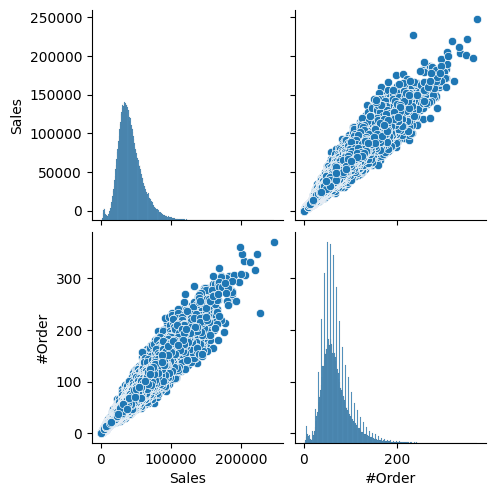

In [ ]:
# Pair Plot for Selected Features
selected_columns = ['Sales', '#Order'] + [col for col in data_encoded.columns if 'Store_Type' in col or 'Holiday' in col or 'Discount' in col]
sns.pairplot(data_encoded[selected_columns])
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA Test
model = ols('Sales ~ C(Store_Type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                     sum_sq        df             F  PR(>F)
C(Store_Type)  2.301735e+13       3.0  35123.644116     0.0
Residual       4.114034e+13  188336.0           NaN     NaN


In [ ]:
from scipy.stats import chi2_contingency

# Chi-Square Test
contingency_table = pd.crosstab(data['Holiday'], data['Discount'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-Square Test\nChi2: {chi2}\nP-Value: {p}\nDegrees of Freedom: {dof}')


Chi-Square Test
Chi2: 71.83301711773726
P-Value: 2.342005358182592e-17
Degrees of Freedom: 1


**2. Bivariate Analysis:**
Examine relationships between sales and potentially influential factors like discounts, holidays, and store types using scatter plots and correlation matrices.

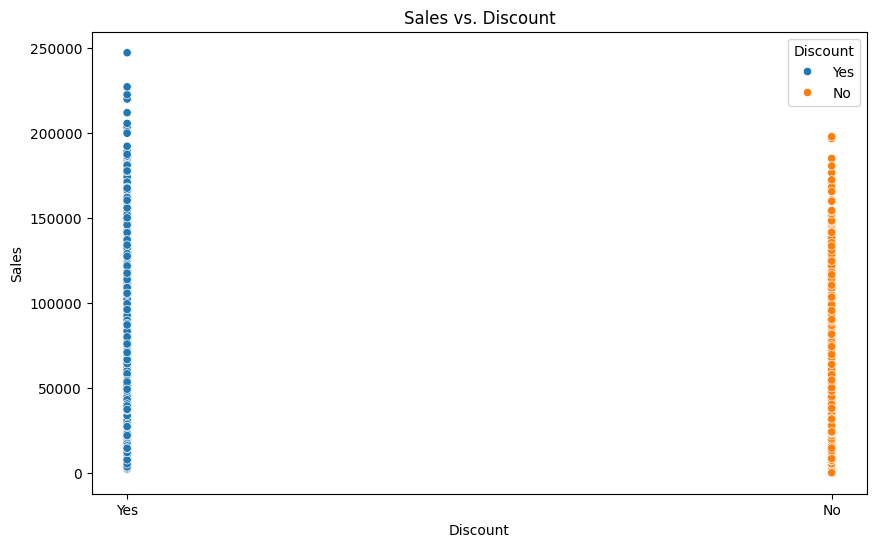

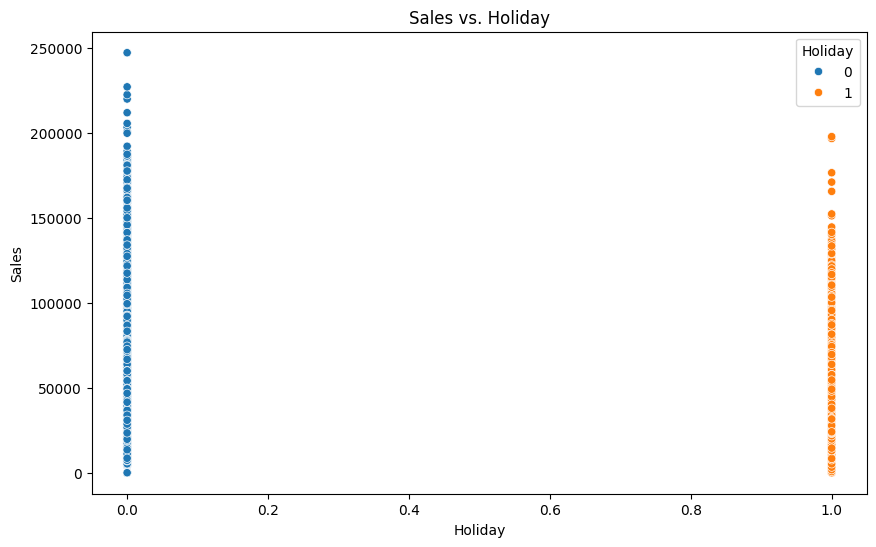

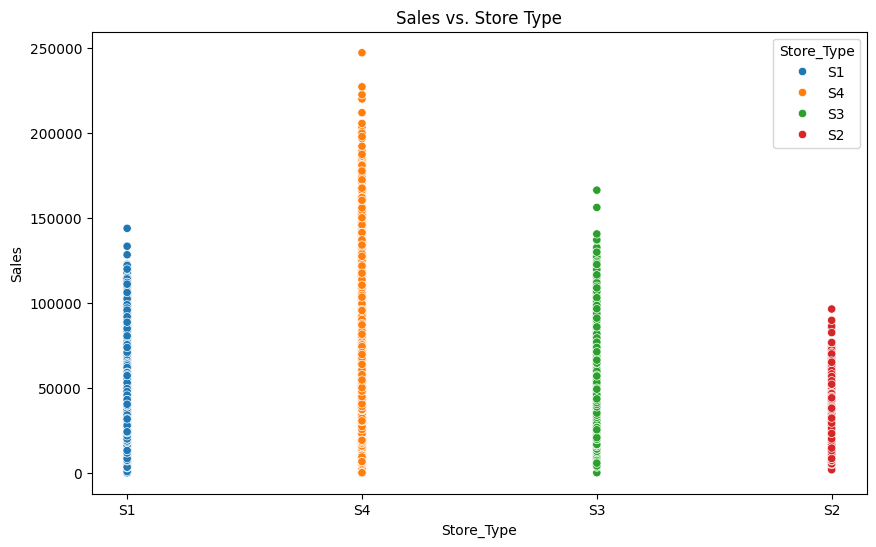

In [ ]:
# Scatter Plot for Sales vs. Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Discount', y='Sales', hue='Discount')
plt.title('Sales vs. Discount')
plt.show()

# Scatter Plot for Sales vs. Holiday
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Holiday', y='Sales', hue='Holiday')
plt.title('Sales vs. Holiday')
plt.show()

# Scatter Plot for Sales vs. Store Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Store_Type', y='Sales', hue='Store_Type')
plt.title('Sales vs. Store Type')
plt.show()


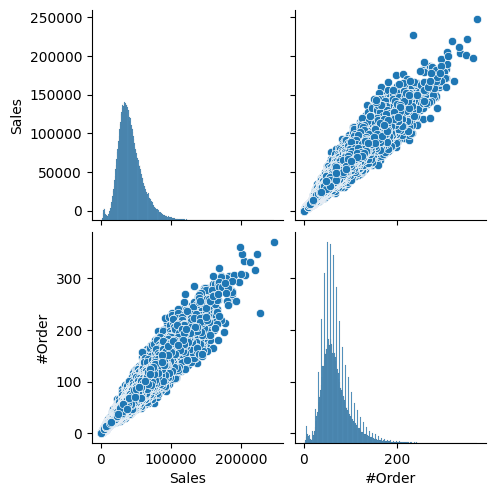

In [ ]:
# Pair Plot for Selected Features
selected_columns = ['Sales', '#Order'] + [col for col in data_encoded.columns if 'Store_Type' in col or 'Holiday' in col or 'Discount' in col]
sns.pairplot(data_encoded[selected_columns])
plt.show()


# Detailed Analysis
### Impact of Discounts:

Sales are higher on discount days, indicating that discounts effectively boost sales.
The presence of higher outliers suggests that large sales spikes occur more frequently during discount periods.
### Impact of Holidays:

Sales are higher on holidays, indicating that holidays drive more sales activity.
Similar to discounts, holidays lead to sales spikes and increased variability in sales.
### Store Type Variability:

Store type significantly influences sales, with S4 stores outperforming others.
This suggests that factors associated with store type, such as location, size, and product assortment, play a crucial role in sales performance.
### Correlation between Sales and Orders:

The strong positive correlation between sales and the number of orders confirms that more orders lead to higher sales.
This relationship is consistent across different conditions, reinforcing the direct impact of order volume on sales revenue.

## 2.3 Time Series Analysis:
### Analyze sales trends over time to identify seasonality, trends, and cyclic behavior.

In [ ]:
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index
data.set_index('Date', inplace=True)

# Resample the data to monthly frequency, summing the sales
monthly_sales = data['Sales'].resample('M').sum()


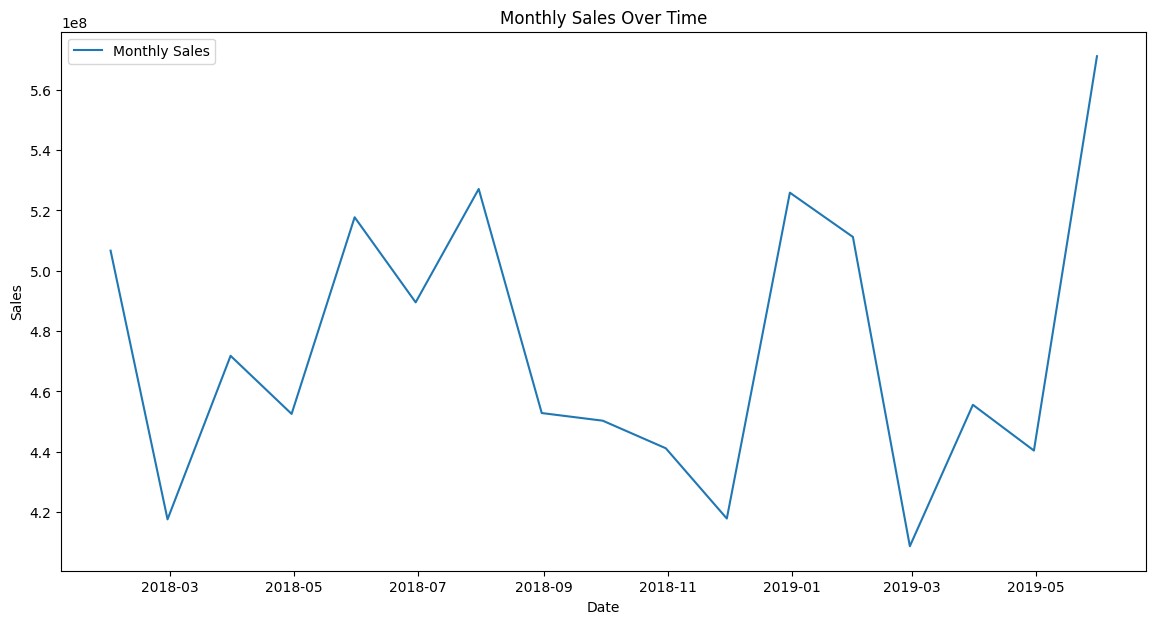

In [ ]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


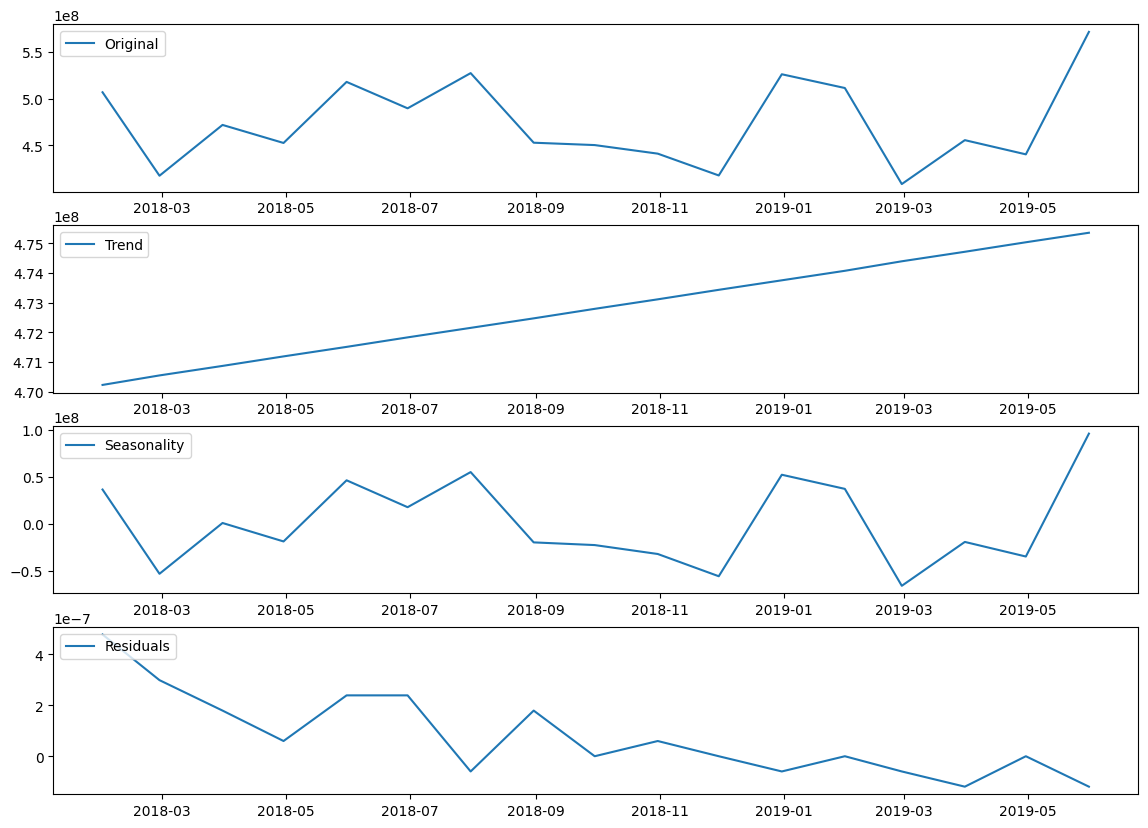

In [ ]:
# Step 3: Apply STL Decomposition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition
stl = STL(monthly_sales, seasonal=13)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic: -2.3339979293852973
p-value: 0.16123724267396394
Critical Value 1%: -4.331573
Critical Value 5%: -3.23295
Critical Value 10%: -2.7487


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.959
Date:                Tue, 23 Jul 2024   AIC                            621.918
Time:                        18:08:40   BIC                            624.235
Sample:                    01-31-2018   HQIC                           622.036
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7059      0.536     -1.317      0.188      -1.756       0.344
ma.L1          0.5529      0.763      0.725      0.469      -0.943       2.049
sigma2      3.543e+15   4.27e-17    8.3e+31      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   17
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -73.001
Date:                            Tue, 23 Jul 2024   AIC                            156.002
Time:                                    18:08:43   BIC                            152.934
Sample:                                01-31-2018   HQIC                           149.269
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5623      8.425     -0.067      0.947     -17.075      15.950
ma.L1          0.4876      9.772   

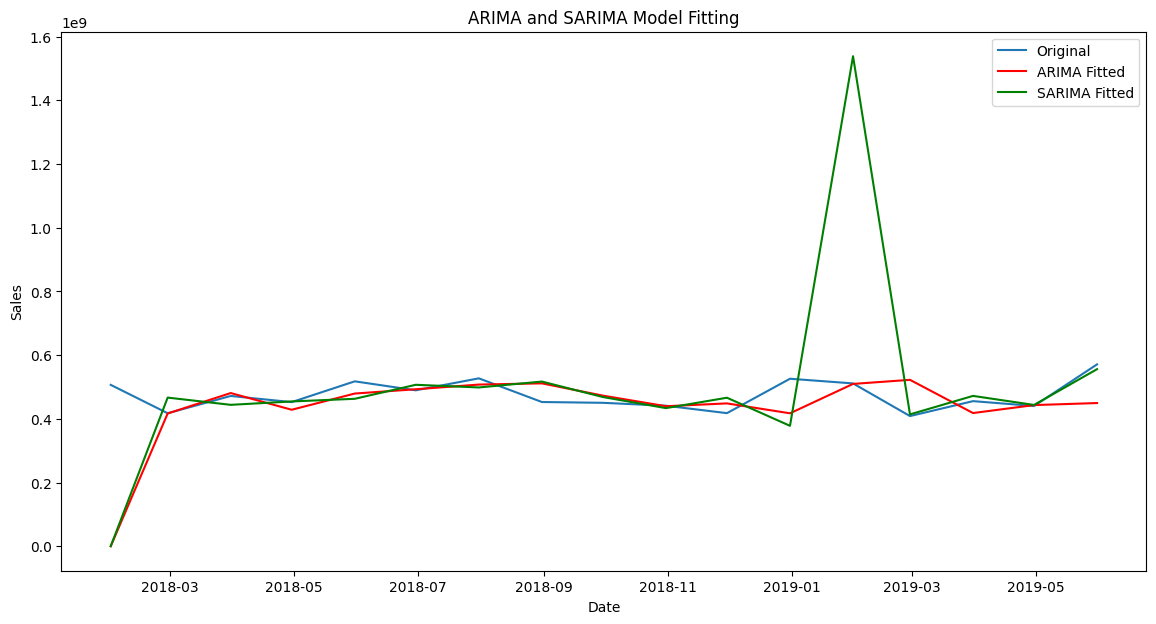

In [ ]:
# Plot Autocorrelation and Partial Autocorrelation

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model
arima_model = ARIMA(monthly_sales, order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Fit SARIMA model
sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

# Plot the forecasts
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Original')
plt.plot(arima_result.fittedvalues, label='ARIMA Fitted', color='red')
plt.plot(sarima_result.fittedvalues, label='SARIMA Fitted', color='green')
plt.title('ARIMA and SARIMA Model Fitting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## 2.4 Categorical Data Analysis:
### Use bar charts and frequency tables to explore the distribution of sales across different store types, locations, and regions.

In [ ]:
# Create Frequency Tables

# Frequency table for Store_Type
store_type_freq = data['Store_Type'].value_counts()
print("Frequency Table for Store_Type:\n", store_type_freq)

# Frequency table for Location_Type
location_type_freq = data['Location_Type'].value_counts()
print("\nFrequency Table for Location_Type:\n", location_type_freq)

# Frequency table for Region_Code
region_code_freq = data['Region_Code'].value_counts()
print("\nFrequency Table for Region_Code:\n", region_code_freq)


Frequency Table for Store_Type:
 Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Frequency Table for Location_Type:
 Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Frequency Table for Region_Code:
 Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64


<ipython-input-31-2eb5dccf8bd6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Store_Type', y='Sales', data=data, estimator=sum, ci=None)


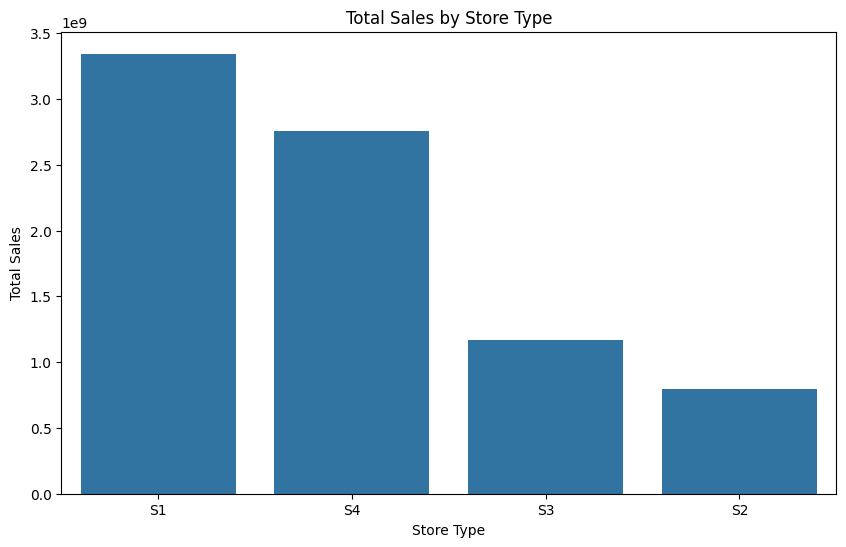

<ipython-input-31-2eb5dccf8bd6>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location_Type', y='Sales', data=data, estimator=sum, ci=None)


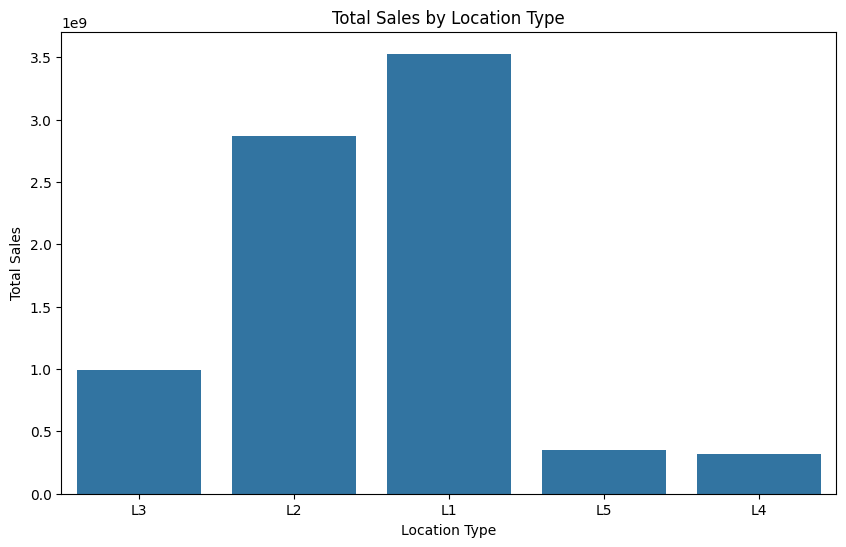

<ipython-input-31-2eb5dccf8bd6>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region_Code', y='Sales', data=data, estimator=sum, ci=None)


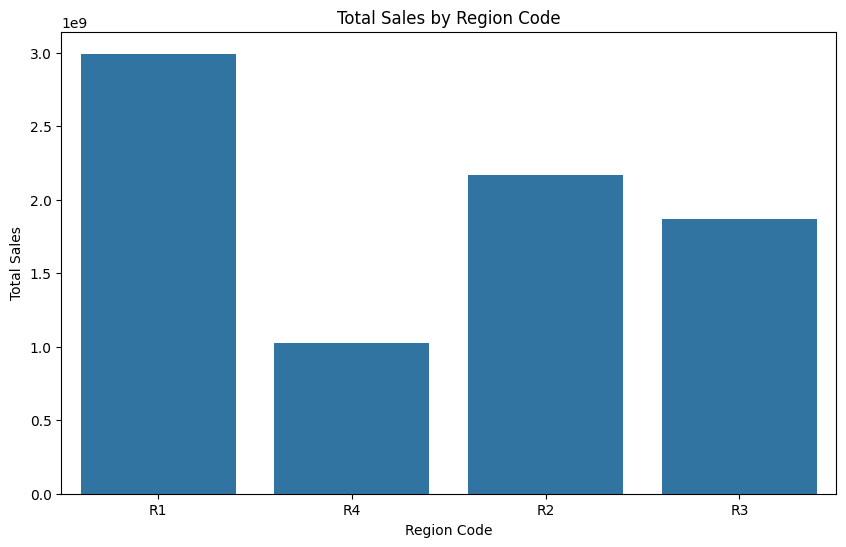

In [ ]:
# Bar chart for sales across different Store_Types
plt.figure(figsize=(10, 6))
sns.barplot(x='Store_Type', y='Sales', data=data, estimator=sum, ci=None)
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.show()

# Bar chart for sales across different Location_Types
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_Type', y='Sales', data=data, estimator=sum, ci=None)
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.show()

# Bar chart for sales across different Region_Codes
plt.figure(figsize=(10, 6))
sns.barplot(x='Region_Code', y='Sales', data=data, estimator=sum, ci=None)
plt.title('Total Sales by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Total Sales')
plt.show()


Summary of the findings from the categorical data analysis using bar charts to explore the distribution of sales across different store types, locations, and regions.

### Total Sales by Store Type
Store Type S1 has the highest total sales, indicating it is the most successful store type in terms of revenue.
Store Type S4 also performs well, with sales slightly lower than S1.
Store Type S3 and Store Type S2 have significantly lower sales compared to S1 and S4, with S2 having the least total sales among all store types.
### Total Sales by Location Type
Location Type L1 generates the highest total sales, indicating it is the most lucrative location type.
Location Type L2 also performs well, with sales slightly lower than L1.
Location Type L3 shows moderate sales.
Location Types L4 and L5 have the lowest total sales, indicating they are less successful in terms of revenue compared to other location types.

# Insights and Recommendations

### Focus on High-Performing Store Types:

* Since S1 and S4 are the highest-performing store types, strategies should be
developed to replicate their success in S3 and S2 stores.
* Investigate what factors contribute to the success of S1 and S4, such as product assortment, store layout, or marketing strategies.

### Optimize Location Strategy:

* L1 and L2 locations are the most profitable, so efforts should be made to understand why these locations perform better. This could involve analyzing foot traffic, demographics, or competitive presence.
* Consider whether it is feasible to convert or upgrade lower-performing L4 and L5 locations to more closely match the characteristics of L1 and L2.

### Targeted Marketing Campaigns:

* Design marketing campaigns that specifically target high-performing store types and locations to maximize returns.
* Use insights from the sales distribution to allocate resources more efficiently, focusing on areas with the highest potential for revenue growth.

### Store Type and Location Improvements:
* For lower-performing store types (S3 and S2) and locations (L4 and L5), conduct detailed assessments to identify areas for improvement.
* Consider store-specific promotions or incentives to boost sales in these areas.

## 2.5 Handling Missing Values:
### Identify any missing data in the dataset and decide on appropriate methods for imputation based on the nature of the data.

Missing Values:
 ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


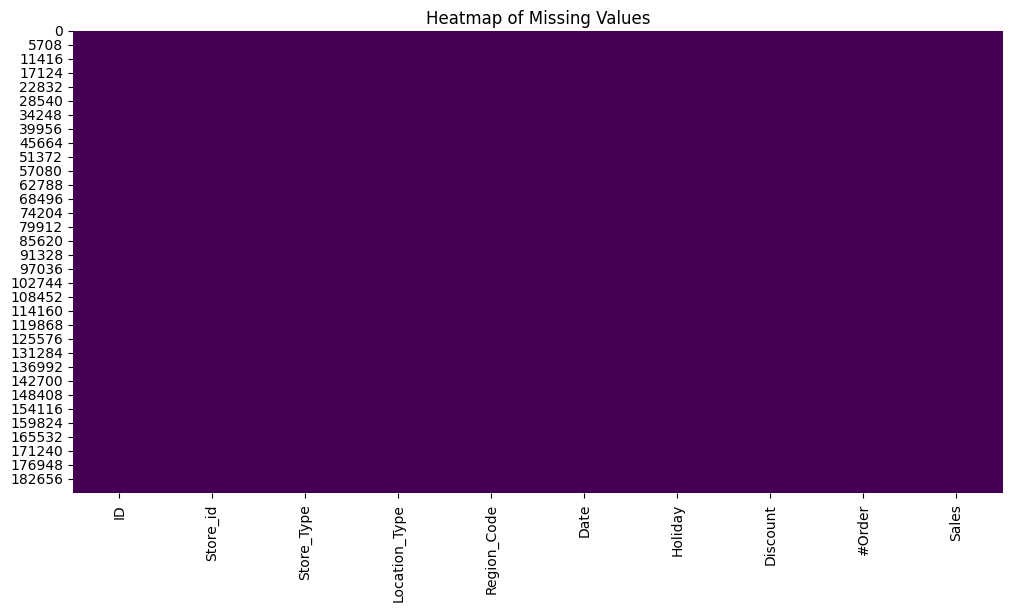

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Scaler/Portfolio/TRAIN.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the data
data.head()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [ ]:
# Step 3: Impute Missing Values
# Numerical Data Imputation:
# Example: Impute missing values in 'Sales' with median
data['Sales'] = data['Sales'].fillna(data['Sales'].median())

# Example: Impute missing values in '#Order' with mean
data['#Order'] = data['#Order'].fillna(data['#Order'].mean())



In [ ]:
# Categorical Data Imputation:
# Example: Impute missing values in 'Store_Type' with mode
data['Store_Type'] = data['Store_Type'].fillna(data['Store_Type'].mode()[0])

# Example: Impute missing values in 'Location_Type' with mode
data['Location_Type'] = data['Location_Type'].fillna(data['Location_Type'].mode()[0])

# Example: Impute missing values in 'Region_Code' with mode
data['Region_Code'] = data['Region_Code'].fillna(data['Region_Code'].mode()[0])


In [ ]:
# Verify that there are no missing values
missing_values_after_imputation = data.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)


Missing Values After Imputation:
 ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


## 2.6 Outlier Detection:
### Detect and handle outliers in the dataset since they can significantly skew the results of the data analysis and model predictions.

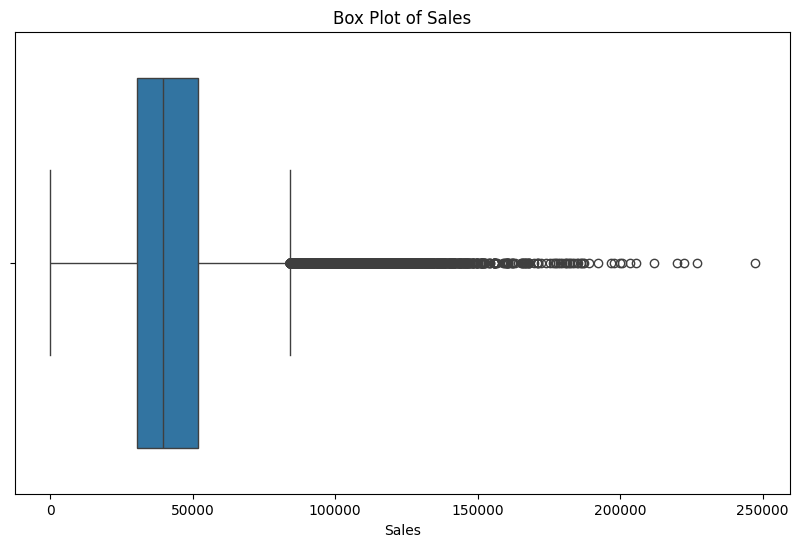

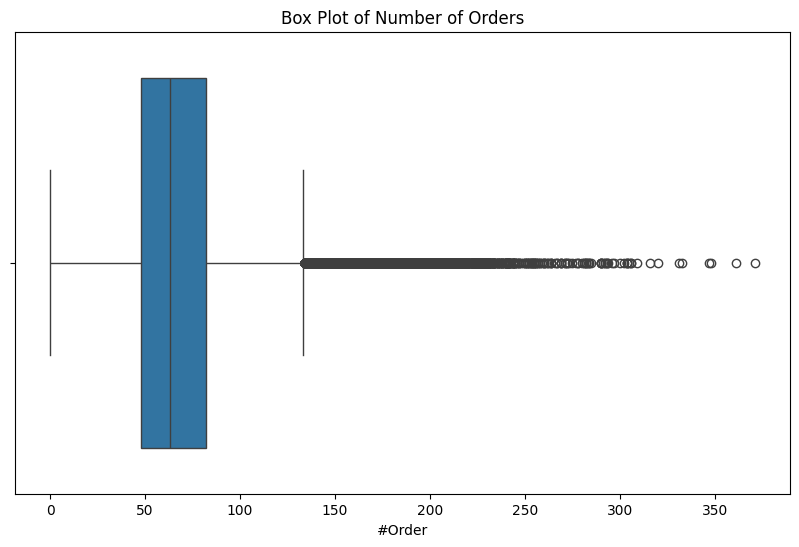

In [ ]:
# Visualize Outliers

# Box plot for Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# Box plot for Number of Orders
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['#Order'])
plt.title('Box Plot of Number of Orders')
plt.show()


In [ ]:
# Detect Outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in Sales
outliers_sales = detect_outliers_iqr(data, 'Sales')
print(f'Number of outliers in Sales: {len(outliers_sales)}')

# Detect outliers in Number of Orders
outliers_orders = detect_outliers_iqr(data, '#Order')
print(f'Number of outliers in Number of Orders: {len(outliers_orders)}')


Number of outliers in Sales: 5843
Number of outliers in Number of Orders: 7089


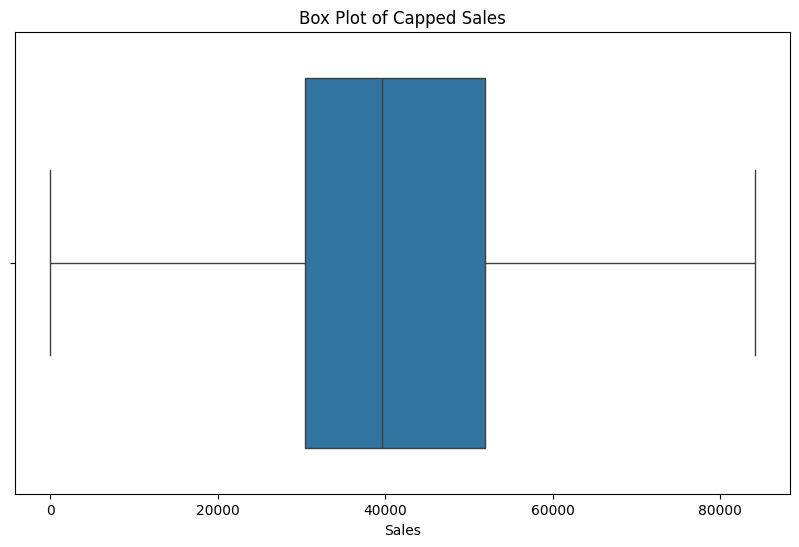

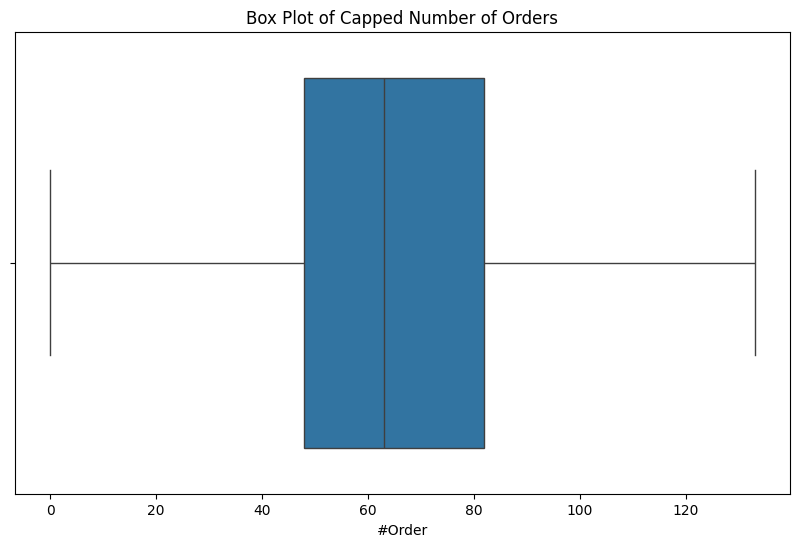

In [ ]:
# Handle Outliers

# Function to cap outliers using IQR
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Cap outliers in Sales
data_capped = cap_outliers_iqr(data.copy(), 'Sales')

# Cap outliers in Number of Orders
data_capped = cap_outliers_iqr(data_capped, '#Order')

# Verify the changes with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_capped['Sales'])
plt.title('Box Plot of Capped Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_capped['#Order'])
plt.title('Box Plot of Capped Number of Orders')
plt.show()


## Summary of Findings from Outlier Detection and Handling
Based on the box plots of capped sales and the number of orders, here are the insights from the outlier detection and handling process:

### Box Plot of Capped Sales
  * Distribution: The capped sales data shows a more symmetrical distribution after capping outliers. The data now falls within a more reasonable range.
  * Outliers: The extreme values have been capped, reducing the presence of outliers and making the dataset more robust for analysis.
  * Range: The capped sales values range from approximately 0 to 80,000, with most of the data concentrated around the central tendency.

### Box Plot of Capped Number of Orders
  * Distribution: The capped number of orders data exhibits a more uniform distribution, with values spread more evenly across the range.
  * Outliers: The extreme values in the number of orders have been capped, minimizing the skewness and enhancing the data's reliability.
  * Range: The capped number of orders ranges from approximately 0 to 120, with most data points clustered around the median.

### Detailed Analysis
1. Initial Detection:

  * The initial box plots showed significant outliers in both the Sales and #Order columns, indicating the presence of extreme values that could skew analysis results.

2. Handling Outliers:
  * Capping Outliers: By capping the outliers using the IQR method, the extreme values were reduced to fall within the acceptable range.
  * This method retains the majority of the data while minimizing the impact of outliers, leading to a more robust dataset.

3. Post-Capping Distribution:
  * Sales: The distribution of sales after capping shows a much more symmetrical and reasonable spread of values, reducing the influence of extreme outliers.
  * Number of Orders: The distribution of the number of orders after capping also exhibits a more balanced spread, making it easier to identify genuine patterns and trends in the data.


In [6]:
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*scipy.stats.shapiro.*")

# Preparing data for the tests
discount_sales = data[data['Discount'] == 'Yes']['Sales']
no_discount_sales = data[data['Discount'] == 'No']['Sales']

holiday_sales = data[data['Holiday'] == 1]['Sales']
non_holiday_sales = data[data['Holiday'] == 0]['Sales']

# Calculating correlation
orders = data['#Order']
sales = data['Sales']

# 1. Impact of Discounts on Sales
t_stat_discount, p_value_discount = stats.ttest_ind(discount_sales, no_discount_sales)

# 2. Effect of Holidays on Sales
t_stat_holiday, p_value_holiday = stats.ttest_ind(holiday_sales, non_holiday_sales)

# 3. Sales Differences Across Store Types
store_type_sales = [data[data['Store_Type'] == store]['Sales'] for store in data['Store_Type'].unique()]
f_stat_store_type, p_value_store_type = stats.f_oneway(*store_type_sales)

# 4. Regional Sales Variability
region_sales = [data[data['Region_Code'] == region]['Sales'] for region in data['Region_Code'].unique()]
# Checking normality assumption
normality_results = [stats.shapiro(region).pvalue for region in region_sales]

if all(p > 0.05 for p in normality_results):
    # Use ANOVA if normal
    f_stat_region, p_value_region = stats.f_oneway(*region_sales)
    test_name_region = "ANOVA"
else:
    # Use Kruskal-Wallis if not normal
    h_stat_region, p_value_region = stats.kruskal(*region_sales)
    test_name_region = "Kruskal-Wallis"

# 5. Correlation between Number of Orders and Sales
corr, p_value_corr = stats.pearsonr(orders, sales)

results = {
    "Discount Impact on Sales": {"t-statistic": t_stat_discount, "p-value": p_value_discount},
    "Holiday Impact on Sales": {"t-statistic": t_stat_holiday, "p-value": p_value_holiday},
    "Sales Differences Across Store Types": {"F-statistic": f_stat_store_type, "p-value": p_value_store_type},
    "Regional Sales Variability": {"test": test_name_region, "statistic": f_stat_region if test_name_region == "ANOVA" else h_stat_region, "p-value": p_value_region},
    "Correlation between Orders and Sales": {"correlation coefficient": corr, "p-value": p_value_corr}
}

results


{'Discount Impact on Sales': {'t-statistic': 148.57853541537764,
  'p-value': 0.0},
 'Holiday Impact on Sales': {'t-statistic': -67.99011744850168,
  'p-value': 0.0},
 'Sales Differences Across Store Types': {'F-statistic': 35123.64411601773,
  'p-value': 0.0},
 'Regional Sales Variability': {'test': 'Kruskal-Wallis',
  'statistic': 3968.063590460667,
  'p-value': 0.0},
 'Correlation between Orders and Sales': {'correlation coefficient': 0.9416005646125761,
  'p-value': 0.0}}